In [7]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

In [8]:
img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(src=img, dsize=(64, 128))
print(img.shape)

(128, 64)


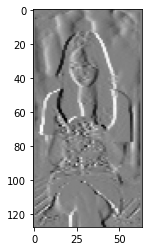

In [12]:
xkernel = np.array([[-1, 0, 1]])
ykernel = np.array([[-1], [0], [1]])
dx = cv2.filter2D(img, cv2.CV_32F, xkernel)
dy = cv2.filter2D(img, cv2.CV_32F, ykernel)
plt.imshow(dx, cmap=plt.cm.gray)

In [13]:
magnitude = np.sqrt(np.square(dx) + np.square(dy))
orientation = np.arctan(np.divide(dy, dx+0.00001)) # radian
orientation = np.degrees(orientation) # -90 -> 90
orientation += 90 # 0 -> 180

In [18]:
cell_size=8
block_size=2
bins=9
num_cell_x = 8 # 8
num_cell_y = 16 # 16
hist_tensor = np.zeros([num_cell_y, num_cell_x, bins]) # 16 x 8 x 9
for cx in range(num_cell_x):
    for cy in range(num_cell_y):
        ori = orientation[cy*cell_size:cy*cell_size+cell_size, cx*cell_size:cx*cell_size+cell_size]
        mag = magnitude[cy*cell_size:cy*cell_size+cell_size, cx*cell_size:cx*cell_size+cell_size]
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
        hist, _ = np.histogram(ori, bins=bins, range=(0, 180), weights=mag) # 1-D vector, 9 elements
        hist_tensor[cy, cx, :] = hist
    pass
pass

In [20]:
redundant_cell = block_size-1
feature_tensor = np.zeros([num_cell_y-redundant_cell, num_cell_x-redundant_cell, block_size*block_size*bins])
for bx in range(num_cell_x-redundant_cell): # 7
    for by in range(num_cell_y-redundant_cell): # 15
        by_from = by
        by_to = by+block_size
        bx_from = bx
        bx_to = bx+block_size
        v = hist_tensor[by_from:by_to, bx_from:bx_to, :].flatten() # to 1-D array (vector)
        feature_tensor[by, bx, :] = v / LA.norm(v, 2)
feature_vector = feature_tensor.flatten()

In [21]:
print(feature_vector)

[0.51561067 0.00644308 0.00948033 ... 0.10023393 0.16279914 0.18493889]
